In [1]:
# Import Braket libraries
from braket.circuits import circuit, Circuit, Gate, Moments
from braket.circuits.instruction import Instruction
from braket.aws import AwsQuantumTask, AwsDevice
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline
import numpy as np
from math import pi

In [29]:
@circuit.subroutine(register=True)
def ch(control, target):
    circ = Circuit().rz(target,pi/2).cnot(control,target).rz(target,-pi/2).ry(target,-pi/4).cnot(control,target).ry(target,pi/4).s(control)
    
    return circ

In [81]:
@circuit.subroutine(register=True)
def w_observable():
    circ = Circuit().ry(1,2*np.arccos(np.sqrt(1/3))).x(2).x(3).cnot(1,2).cnot(1,3).ch(1,2).cnot(2,3).h(0).cnot(0,1).cnot(0,2).cnot(0,3)
    
    return circ

In [84]:
@circuit.subroutine(register=True)
def prep_state():
    circ = Circuit().x(0).x(1)
    
    return circ

In [69]:
@circuit.subroutine(register=True)
def expt_rho_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.add_circuit(prep_state())
        
    return tr_rho_w

In [60]:
@circuit.subroutine(register=True)
# TEST CONTROLLED HADAMARD GATE
def test():
    circ = Circuit().x(0).x(1).ch(0,1)
    
    return circ

## Device: Classical Simulator

### state: 000

In [88]:
# set up device: Local Simulator
device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

# Please enter the S3 bucket you created during onboarding in the code below
my_bucket = "amazon-braket-qitkaistuser3" # the name of the bucket
my_prefix = "observable-output" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

In [54]:
# Quantum circuit for w-observable estimation
print(expt_rho_w())

T  : |   0    |1|    2     |3|    4    |    5     |6|    7    |8|9|10|11|12|13|
                                                                               
q0 : -H--------------------------------------------------------C-C-C--C--C--H--
                                                               | | |  |  |     
q1 : -Ry(2.09)-C-C----------C----------------------C-S---------X-|-|--X--|-----
               | |          |                      |             | |     |     
q2 : -X--------X-|-Rz(1.57)-X-Rz(-1.57)-Ry(-0.785)-X-Ry(0.785)-C-X-|-----X-----
                 |                                             |   |           
q3 : -X----------X---------------------------------------------X---X-----------

T  : |   0    |1|    2     |3|    4    |    5     |6|    7    |8|9|10|11|12|13|


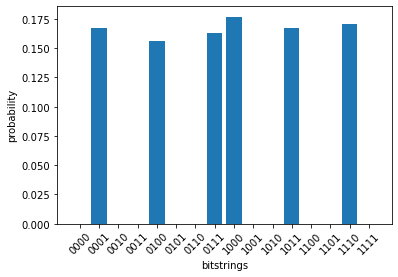

In [85]:
shots = 5000
num_qubits = 4
task = device.run(expt_rho_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

In [43]:
print(test())

T  : |   0    |1|    2    |    3     |4|    5    |
                                                  
q0 : ----------C----------------------C-S---------
               |                      |           
q1 : -Rz(1.57)-X-Rz(-1.57)-Ry(-0.785)-X-Ry(0.785)-

T  : |   0    |1|    2    |    3     |4|    5    |


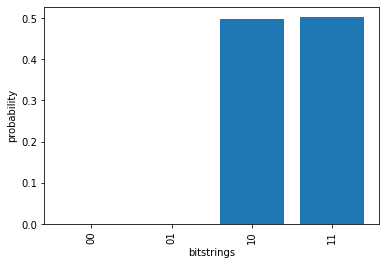

In [61]:
shots = 5000
num_qubits = 4
task = device.run(expt_rho_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 000

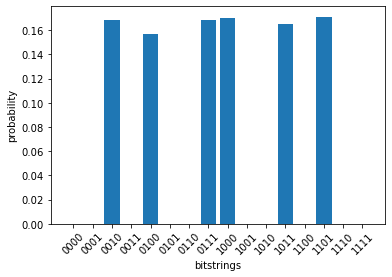

In [89]:
@circuit.subroutine(register=True)
def expt_rho1_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_rho1_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: GHZ_3

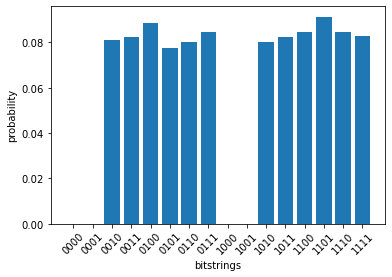

In [90]:
@circuit.subroutine(register=True)
def expt_GHZ_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.cnot(0,2).cnot(0,1).h(0)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_GHZ_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 001

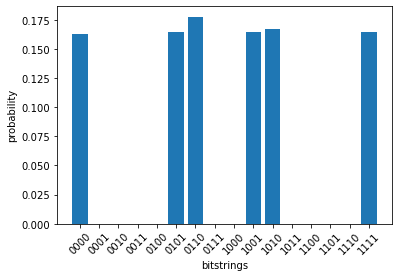

In [91]:
@circuit.subroutine(register=True)
def expt_001_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(2)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_001_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 010

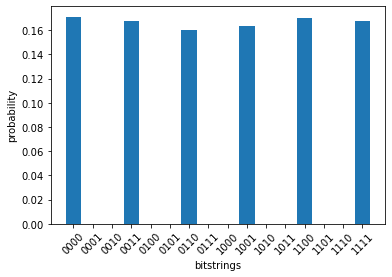

In [92]:
@circuit.subroutine(register=True)
def expt_010_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(1)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_010_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 100

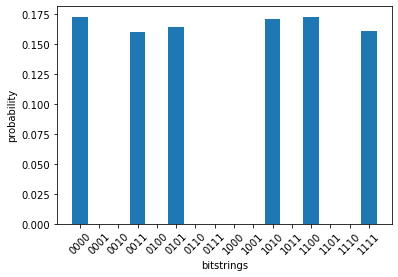

In [93]:
@circuit.subroutine(register=True)
def expt_100_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(0)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_100_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 011

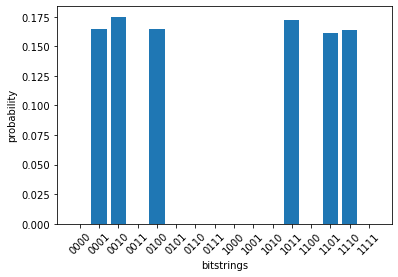

In [94]:
@circuit.subroutine(register=True)
def expt_011_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(1).x(2)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_011_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

## Device: IonQ

In [96]:
from braket.aws import AwsDevice

# set up device: Local Simulator
device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")

# Please enter the S3 bucket you created during onboarding in the code below
my_bucket = "amazon-braket-qitkaistuser3" # the name of the bucket
my_prefix = "observable_output" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

### state: 000

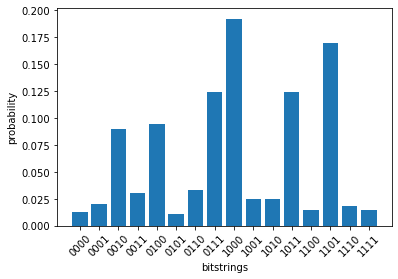

In [97]:
@circuit.subroutine(register=True)
def expt_rho1_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_rho1_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: GHZ_3

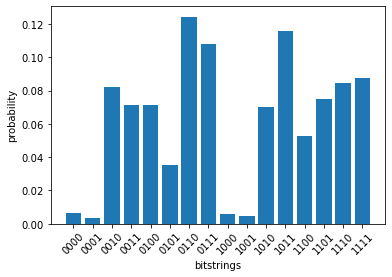

In [98]:
@circuit.subroutine(register=True)
def expt_GHZ_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.cnot(0,2).cnot(0,1).h(0)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_GHZ_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 001

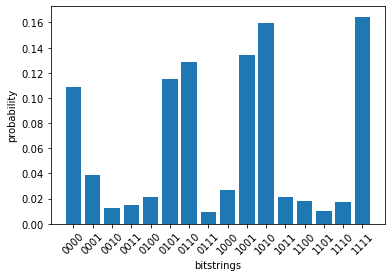

In [99]:
@circuit.subroutine(register=True)
def expt_001_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(2)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_001_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 010

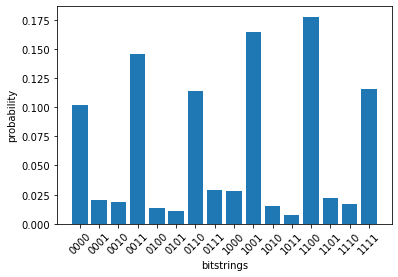

In [100]:
@circuit.subroutine(register=True)
def expt_010_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(1)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_010_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 100

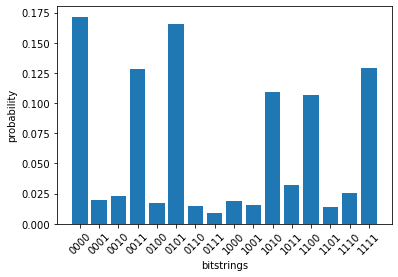

In [101]:
@circuit.subroutine(register=True)
def expt_100_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(0)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_100_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);

### state: 011

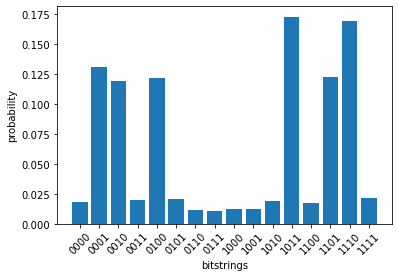

In [102]:
@circuit.subroutine(register=True)
def expt_011_w():
    tr_rho_w = Circuit()
    tr_rho_w.add_circuit(w_observable())
    tr_rho_w.x(1).x(2)
        
    return tr_rho_w

shots = 5000
num_qubits = 4
task = device.run(expt_011_w(), s3_folder, shots)
counts = task.result().measurement_counts

# bitstrings
import numpy

format_bitstring = '{0:0' + str(num_qubits) + 'b}'
bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]
prob_values = [counts[bitstring_keys[ii]] / shots for ii in range(len(bitstring_keys))]
prob_values = numpy.array(prob_values)

# plot probabalities
plt.bar(bitstring_keys, prob_values);
plt.xlabel('bitstrings');
plt.ylabel('probability');
plt.xticks(rotation=45);